In [464]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [465]:
data = pd.read_csv('https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L1/data_square.csv')
data

,Diện tích,Giá nhà
0,30.0000,-100.0000
1,32.4138,-190.7250
2,34.8276,-269.7980
3,37.2414,-337.2180
4,39.6552,-392.9850
5,42.0690,-437.0990
6,44.4828,-469.5600
7,46.8966,-490.3690
8,49.3103,-499.5240
9,51.7241,-497.0270


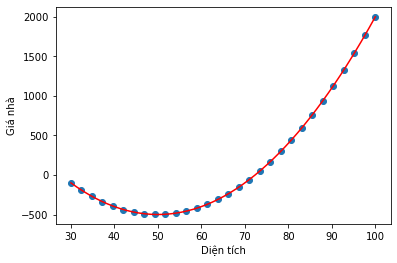

In [466]:
x = np.array(data['Diện tích'])
y = np.array(data['Giá nhà'])
plt.xlabel('Diện tích')
plt.ylabel('Giá nhà')

w = np.polyfit(x, y, 2)

x_line = np.linspace(x[0], x[-1], num=len(x)*5)
predict = np.poly1d(w)
y_line = predict(x_line)

plt.plot(x_line, y_line, color='red')
plt.scatter(x,y)



## Exercise 2

In [467]:
def function(x):
    return np.sin(2 * np.pi * x)

def create_data(sample_size, std):
    x = np.linspace(0, 1, sample_size)
    t = function(x) +np.random.normal(scale = std, size = x.shape)
    return x, t     

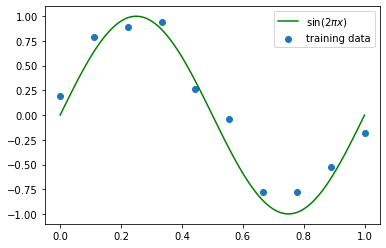

In [468]:
x, y = create_data(10, 0.25)
x_line = np.linspace(0, 1, 100)
y_line = function(x_line)

plt.scatter(x, y, label='training data')
plt.plot(x_line, y_line, color='green', label="$\sin(2\pi x)$")
plt.legend()
plt.show()

In [469]:
#x = np.column_stack((np.ones((x.shape[0], 1)), x))

In [470]:
class LinearRegression:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def find_w(self):
        self.w = inv(self.x.T @self.x) @ self.x.T@self.y
        return self.w
    
    def predict(self, x):
        self.y_pred = np.dot(self.x, self.w)
        return self.y_pred
    


### a. fit đa thức bậc 0, 1, 3, 6, 9, vẽ mô hình và nhận xét mô hình

In [471]:
def degree(x, deg):
    x_new = np.ones((x.shape[0], 1)).reshape(-1,1)
    x = x.reshape(-1,1)

    for i in range(1, deg+1):
        x_new = np.hstack((x_new, x**i))
    return x_new

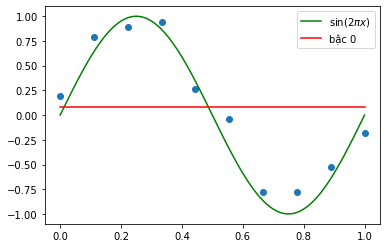

In [472]:
x_degree_0 = degree(x, 0)
x_degree_0
w = inv(x_degree_0.T @x_degree_0) @ x_degree_0.T@y

x_test = degree(x_line, 0)
y_0_pred = x_test@w

plt.scatter(x, y)
plt.plot(x_line, y_line, color='green', label="$\sin(2\pi x)$")
plt.plot(x_line, y_0_pred, color='red', label='bậc 0')
plt.legend()

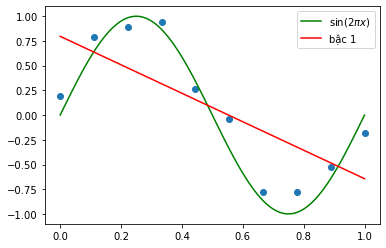

In [473]:
x_degree_1 = degree(x, 1)
w1 = inv(x_degree_1.T @x_degree_1) @ x_degree_1.T@y

x_test = degree(x_line, 1)
y_1_pred = x_test@w1

plt.scatter(x, y)
plt.plot(x_line, y_line, color='green', label="$\sin(2\pi x)$")
plt.plot(x_line, y_1_pred, color="red", label="bậc 1")
plt.legend()


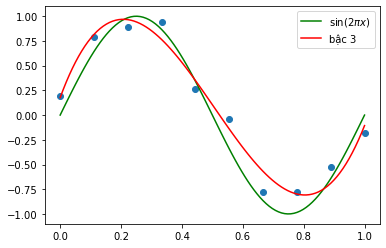

In [474]:
x_degree_3 = degree(x, 3)
w3 = inv(x_degree_3.T @x_degree_3) @ x_degree_3.T@y

x_test = degree(x_line, 3)
y_3_pred = x_test@w3

plt.scatter(x, y)
plt.plot(x_line, y_line, color='green', label="$\sin(2\pi x)$")
plt.plot(x_line, y_3_pred, color="red", label="bậc 3")
plt.legend()


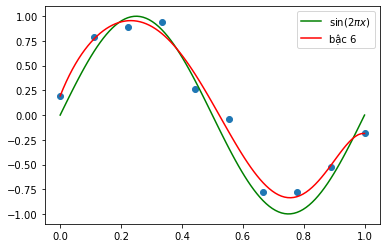

In [475]:
x_degree_6 = degree(x, 6)
w6 = inv(x_degree_6.T @x_degree_6) @ x_degree_6.T@y

x_test = degree(x_line, 6)
y_6_pred = x_test@w6

plt.scatter(x, y)
plt.plot(x_line, y_line, color='green', label="$\sin(2\pi x)$")
plt.plot(x_line, y_6_pred, color="red", label="bậc 6")
plt.legend()

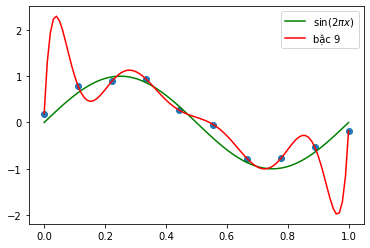

In [476]:
x_degree_9 = degree(x, 9)
w9 = inv(x_degree_9.T @x_degree_9) @ x_degree_9.T@y

x_test = degree(x_line, 9)
y_9_pred = x_test@w9

plt.scatter(x, y)
plt.plot(x_line, y_line, color='green', label="$\sin(2\pi x)$")
plt.plot(x_line, y_9_pred, color="red", label="bậc 9")
plt.legend()

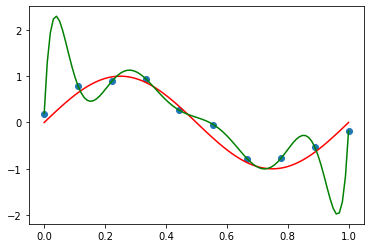

In [477]:
#cách dùng polyfit. ví dụ với bậc 9, tường tự với bậc 0,1,3,6 thay số vào polyfit
w = np.polyfit(x, y, 9)

x_line = np.linspace(0,1,100)
predict = np.poly1d(w)
y_pred = predict(x_line)


plt.plot(x_line, y_line, color='red')
plt.plot(x_line, y_pred, color='green')
plt.scatter(x,y)

### Nhận xét mô hình
- Mô hình bậc 0: underfitting
- Mô hình bậc 1: underfitting
- Mô hình bậc 3: good fit
- Mô hình bậc 6: good fit
- Mô hình bậc 9: overfitting

### b. Thêm 15, 100 điểm dữ liệu cho đa thức bậc 9, nhận xét mức độ overfitting

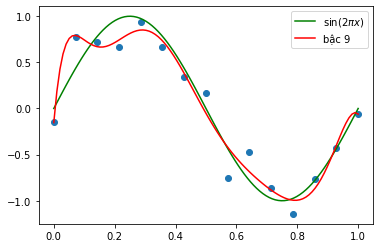

In [478]:
x, y = create_data(15, 0.25)
x_degree_9 = degree(x, 9)
w9 = inv(x_degree_9.T @x_degree_9) @ x_degree_9.T@y

x_test = degree(x_line, 9)
y_pred = x_test@w9

plt.scatter(x, y)
plt.plot(x_line, y_line, color='green', label="$\sin(2\pi x)$")
plt.plot(x_line, y_pred, color="red", label="bậc 9")
plt.legend()


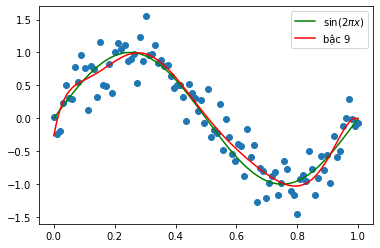

In [479]:
x, y = create_data(100, 0.25)
x_degree_9 = degree(x, 9)
w9 = inv(x_degree_9.T @x_degree_9) @ x_degree_9.T@y

x_test = degree(x_line, 9)
y_pred = x_test@w9

plt.scatter(x, y)
plt.plot(x_line, y_line, color='green', label="$\sin(2\pi x)$")
plt.plot(x_line, y_pred, color="red", label="bậc 9")
plt.legend()

We see that increasing the size of data set (15 vs 100) can reduces the overfitting problems

### c. fit đa thức bậc 9 cho 10 điểm dữ liệu ban đầu nhưng dùng Ridge và Lasso để tránh overfitting


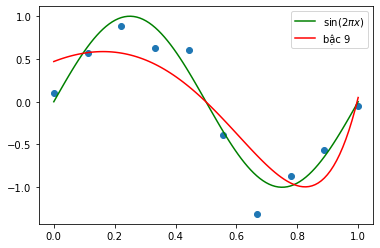

In [483]:
#Ridge
x, y = create_data(10, 0.25)
x_degree_9 = degree(x, 9)
w9 = inv(x_degree_9.T@x_degree_9 + 0.01*np.identity(x.shape[0]))  @ x_degree_9.T@y

x_test = degree(x_line, 9)
y_pred = x_test@w9

plt.scatter(x, y)
plt.plot(x_line, y_line, color='green', label="$\sin(2\pi x)$")
plt.plot(x_line, y_pred, color="red", label="bậc 9")
plt.legend()